# Subplots

In [127]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
# Desactivo el límite de figuras que permite tener abiertas matplotlib de manera simultánea
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

plt.subplot?

<IPython.core.display.Javascript object>


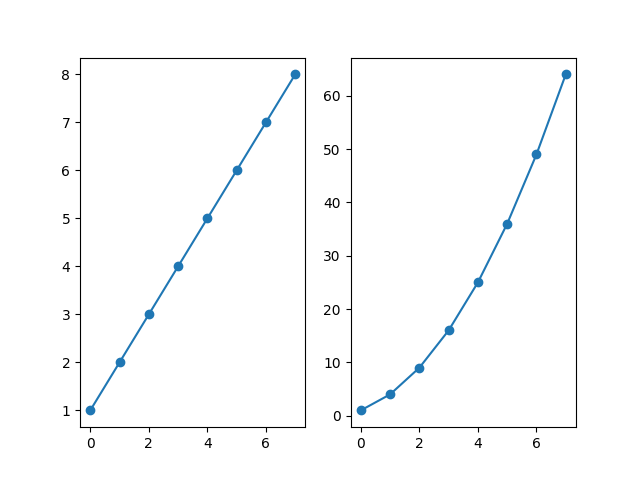

In [70]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [71]:
# Notese que los ejes Y de arriba tienen distintos tamaños

exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

<IPython.core.display.Javascript object>


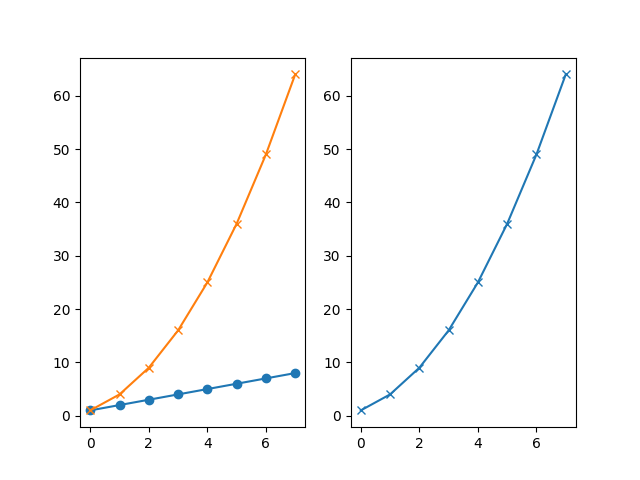

In [72]:
# Si ponemos ambos datos (lineales y exponenciales) dentro del mismo subplot de la uzquierda (1,2,1), vemos que antes el 
# eje Y de ambos subplots tenían distintos tamaños

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
plt.plot(exponential_data, '-x')
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')



<IPython.core.display.Javascript object>


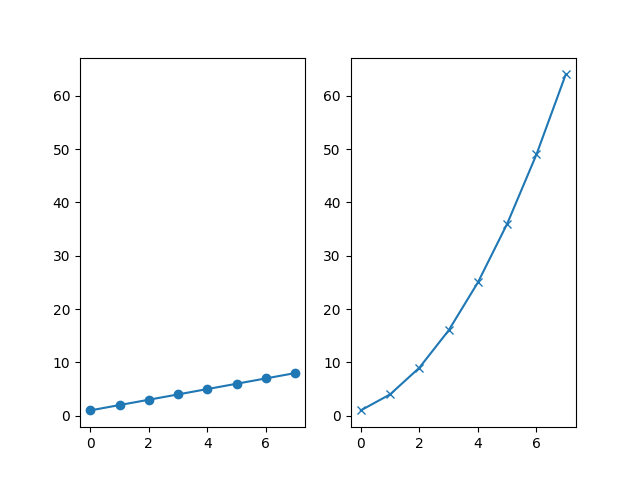

In [73]:
# Compartir eje Y entre dos subplots para que tengan las mismas dimensiones

plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# Acá nos aseguramos de que el segundo subplot (1,2,2) comparta el eje y con el primer subplot (1,2,1)
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

In [74]:
# Vemos que podemos definir los subplot con comas o con números enteros sin comas: (1,2,1) == (121)

# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

True

<IPython.core.display.Javascript object>


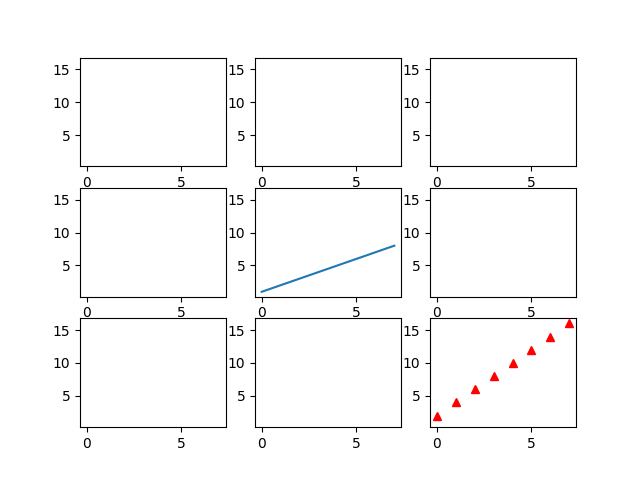

In [75]:
# Podemos fijar los ejes X e Y de varios subplots con el comando plt.subplots y fijando sus ejes con sharex y sharey.

# create a 3x3 grid of subplots
# Acá haremos el tuple unpacking de la figura y los 9 subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

# Agrego datos en el subplot9 = ax9
ax9.plot(linear_data*2, 'r^')

In [76]:
# Fig es el objeto figura, o sea, la figura que contiene los distintos subplots

type(fig)

matplotlib.figure.Figure

In [77]:
plt.gcf() == fig

True

In [78]:
plt.gcf().gca()

In [79]:
# set inside tick labels to visible
# acá plt.gcf() es == fig
# la figura tiene 9 subplots, cada uno con sus axes

for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [80]:
# plt.gcf() puede reemplazarse por fig que definimos en la línea 21

for ax in fig.get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

<IPython.core.display.Javascript object>


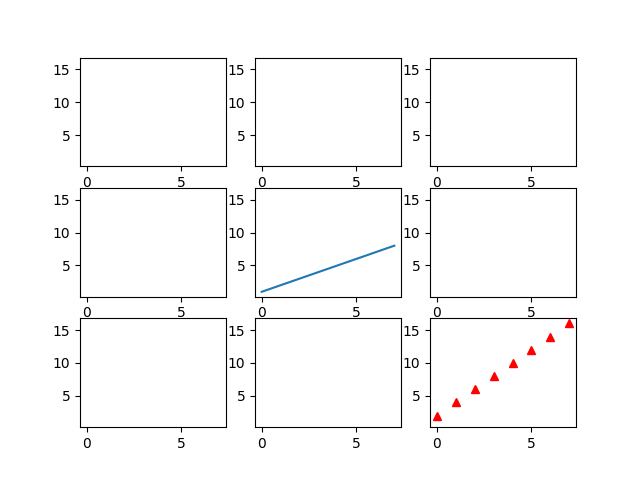

In [81]:
fig

In [82]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


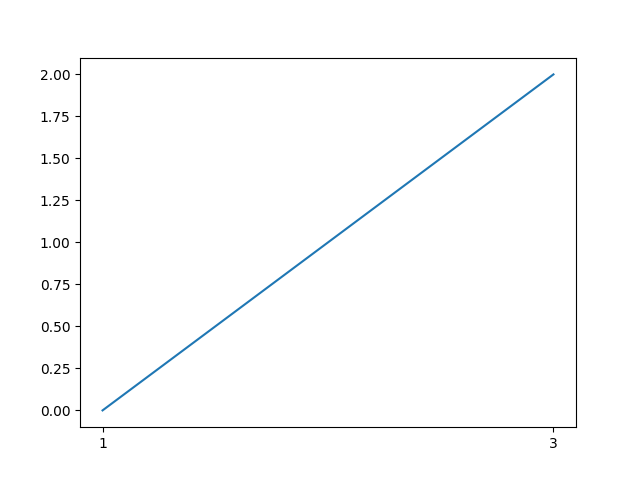

In [83]:
# Ahora pruebo con gráficos que no tienen subplots

plt.figure()
plt.plot([1,2,3],[0,1,2])


In [84]:
ax = plt.gca()

# Obtengo la posiciones de los marcadores en X
ax.get_xticks()

array([ 0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
        3.  ,  3.25])

In [85]:
# Vemos la equivalencia
print(ax.set_xticks([1,3]) == plt.gca().set_xticks([1,3]))


# Le cambio los xticks del gráfico
ax.set_xticks([1,3])
plt.gca()

True


<IPython.core.display.Javascript object>


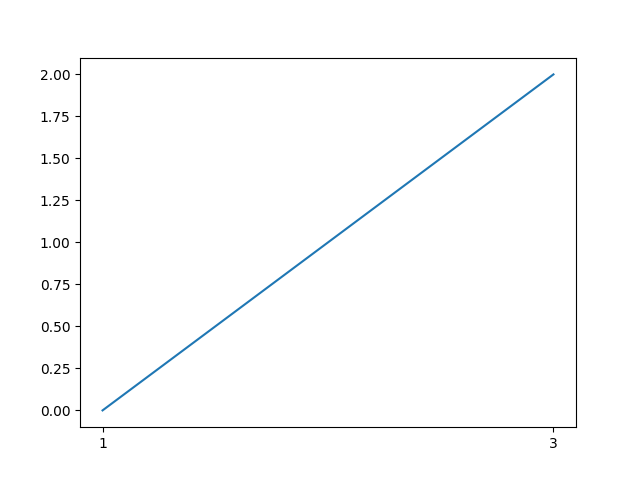

In [86]:
plt.gcf()

# Histograms

<IPython.core.display.Javascript object>


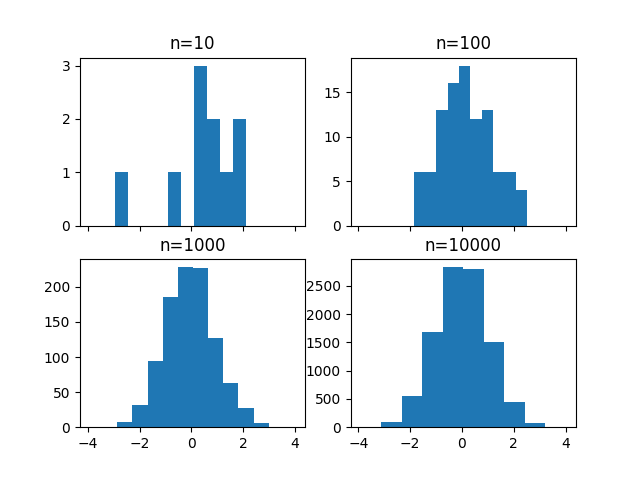

In [87]:
# create 2x2 grid of axis subplots
# Adicionalmente compartimos los ejes X para que tengan las mismas dimensiones.


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


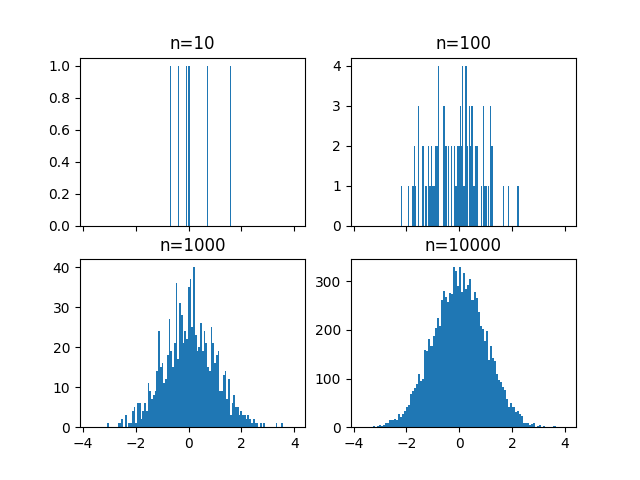

In [88]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


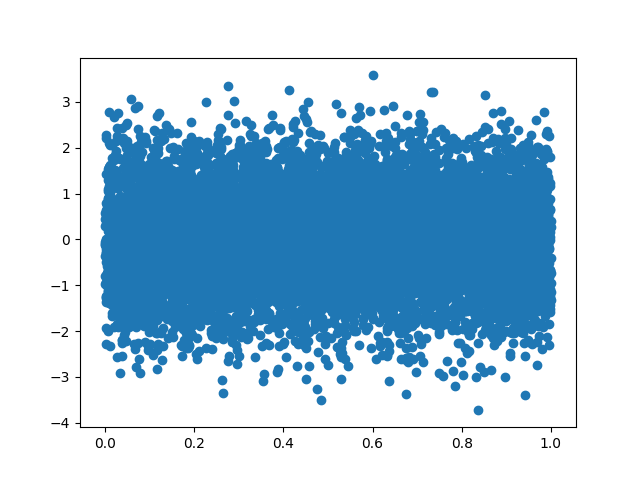

In [89]:
# Vamos a graficar datos al azar con distribución normal en el eje Y y valor completamente al azar en el eje X

plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

# Al graficar vemos que no se puede apreciar ninguna distribución dentro de la nube de datos.
# ¿Pero qué pasaría si graficamos la distribución de cada variable por separado?

<IPython.core.display.Javascript object>


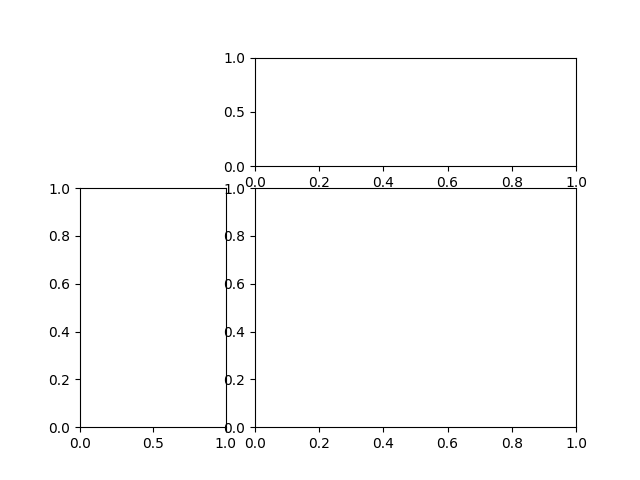

In [90]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

<IPython.core.display.Javascript object>


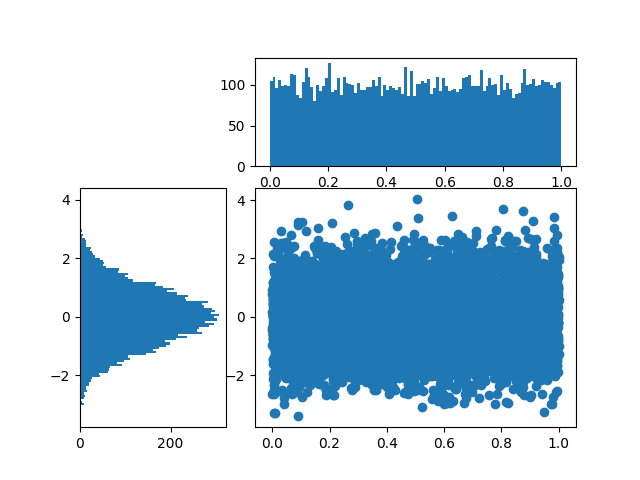

In [91]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# Hacemos una primera prueba de los gráficos

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

<IPython.core.display.Javascript object>


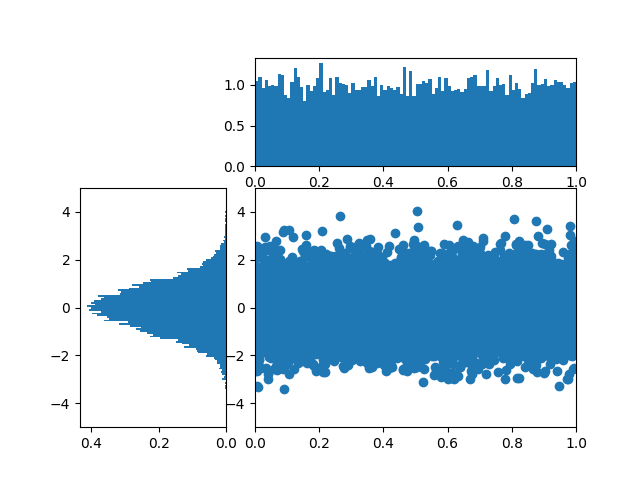

In [92]:
# Pero podemos mejorarlos los gráficos.
# 1- podemos hacer que los ejes Y de los histogramas demuestre frecuencias con valores 0-1 con el parámetro normed=True de .hist()
# 2- Podemos invertir el eje x (sería el Y de los datos) del gráfico del side_histogram con invert_xaxis() 
# .clear() saca todos los datos del subplot

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])


# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
lower_right.scatter(X, Y)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [93]:
# Podemos hacer que las dimensiones de los ejes coincidad entre los distintos subplots:

# change axes limits
# para eso iteramos sobre los axes de los subplots top y lower y definimos los límites de sus ejes X para que sean iguales
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)

    
# despues iteramos sobres los axes de los subplots side y lower y definimos los límites de sus ejes Y para que sean iguales
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [94]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [95]:
# Se crea una df con 3 columnas y 10.000 datos generados al azar en cada una de ellas para 3 tipos de distribuciones:
# normal, azar, y gamma.

df.head()

,gamma,normal,random
0,1.135002,0.698469,0.131863
1,1.902032,-0.935106,0.546538
2,1.859397,1.295418,0.350984
3,5.387071,-0.548790,0.992274
4,0.944816,-0.230756,0.610082


<IPython.core.display.Javascript object>


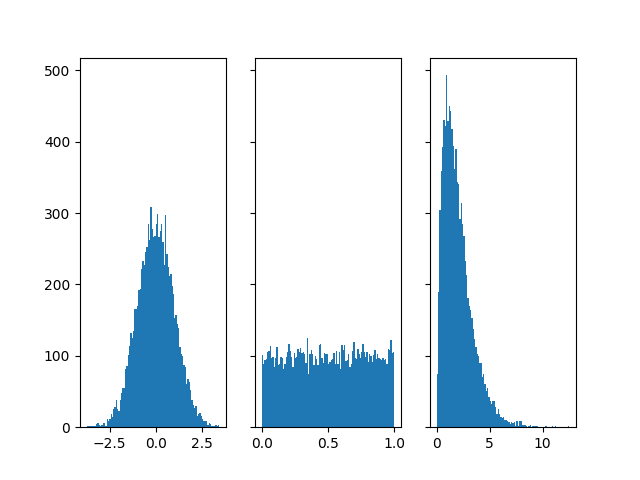

In [96]:
# Creo una figura y sus subplots indicando que compartan eje Y
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)


# Grafico cada una de las distribuciones y selecciono un nro de bins = 100
_1 = ax1.hist(normal_sample, bins=100)
_2 = ax2.hist(random_sample, bins=100)
_3 = ax3.hist(gamma_sample, bins=100)

# asigné los gráficos a variables (_x) porque sino el Jupyter notebook imprime el output y queda desprolijo
# funciona perfectamente sin asignarle nombres, es solo para que quedé todo más prolijo


In [97]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.006800,0.004063,0.502914
std,1.405449,0.999810,0.288780
min,0.007572,-3.749324,0.000203
25%,0.968871,-0.672123,0.254664
50%,1.707183,0.006048,0.501332
75%,2.698427,0.673451,0.753848
max,12.509344,3.443870,0.999916


<IPython.core.display.Javascript object>


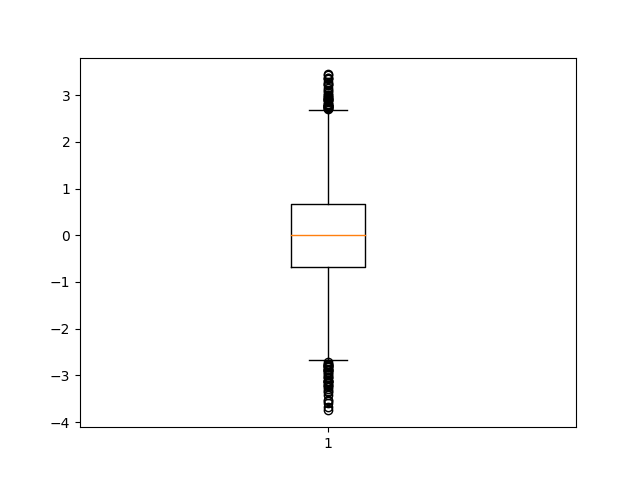

In [98]:
plt.figure()

# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'])

# igual que antes, se asigna el boxplot a una variables "_" para que no imprima el output de la llamada.
# las variables "_" no aportan info y se suelen usar para datos que no volveran a usarse (unpacking por ej)

<IPython.core.display.Javascript object>


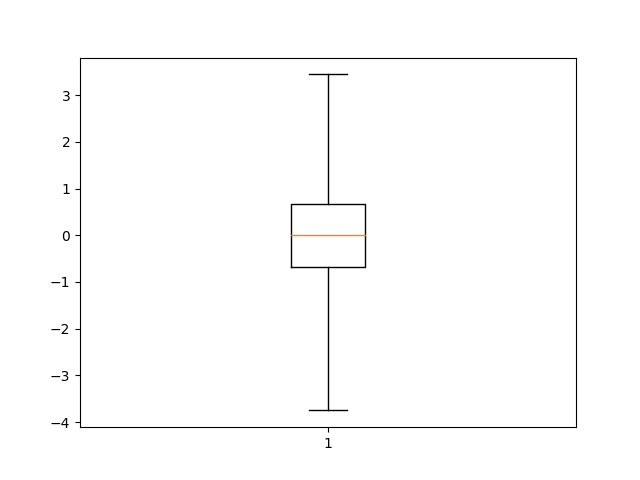

In [99]:
plt.figure()

# Si usamos el parámetro whis='range' lo que hace es gráficar los máximos y los mínimos en los whiskers.
# Si no lo usamos, como en la figura de arriba, los whiskers son el 50% del interquartile y sirve para detectar outlayers
_ = plt.boxplot(df['normal'], whis='range')


<IPython.core.display.Javascript object>


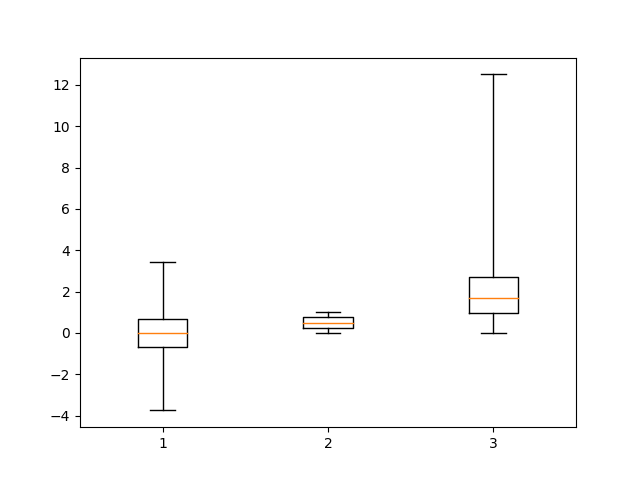

In [100]:
# Graficamos las 3 distribuciones de datos creadas anteriormente

plt.figure()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


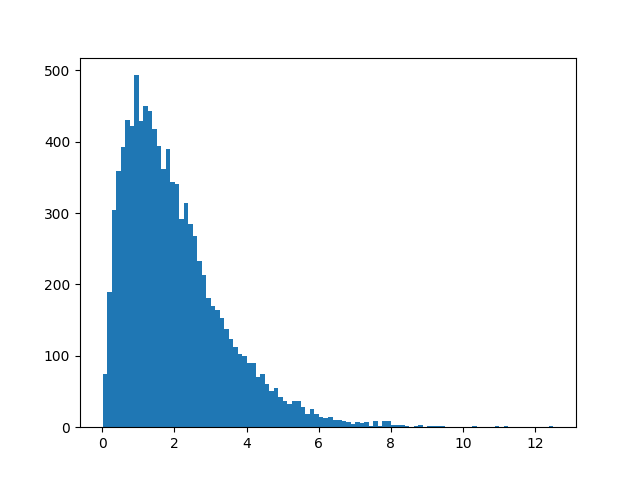

In [101]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


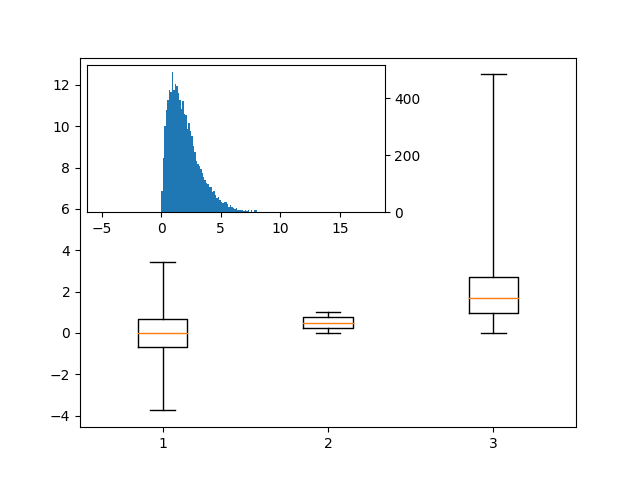

In [102]:
# Insert axis

# Sirve para insertar un axes (gráfico adicional) sobre un axes base.

import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
# Definimos el gráfico de base, o sea, el axes de base
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

# Aora creamos axes sobre el axes de base (plt.gca()), indicamos su tamaño con % y su localización con loc.
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)

# Ahora definimo qué gráfico será el que ponemos sobre el gráfico de base
ax2.hist(df['gamma'], bins=100)

#  Le agrega un margen al x, y lo desplaza hacia la derecha
ax2.margins(x=0.5)

In [103]:
# Invertimos de lado los labels del gráfico insertado, pasan de la izq hacia la derecha
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


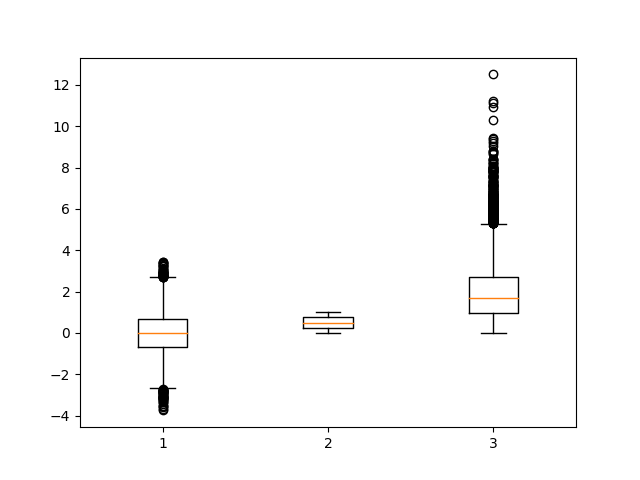

In [104]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


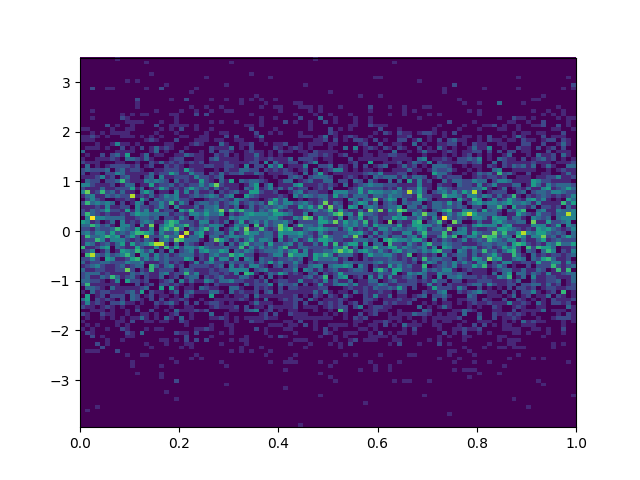

In [105]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=100)

<IPython.core.display.Javascript object>


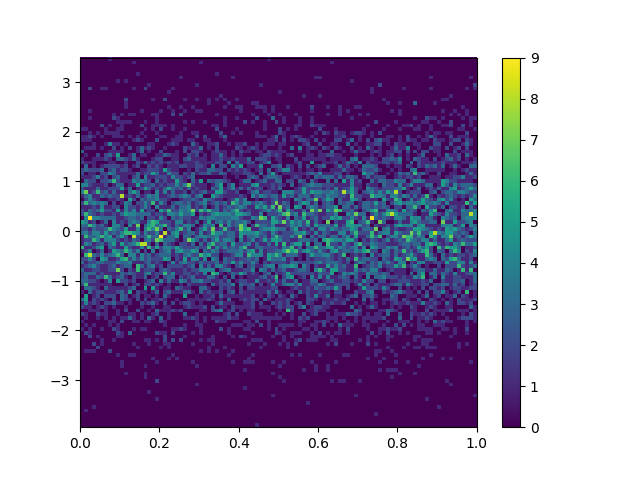

In [106]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [107]:
# add a colorbar legend
plt.colorbar()

In [108]:
# Hay que tener cuidado con la cantidad de bins que se definan, porque si ponemos demasiados, cada punto
# será una categoría y no habrían distintos colores para graficar.

<IPython.core.display.Javascript object>


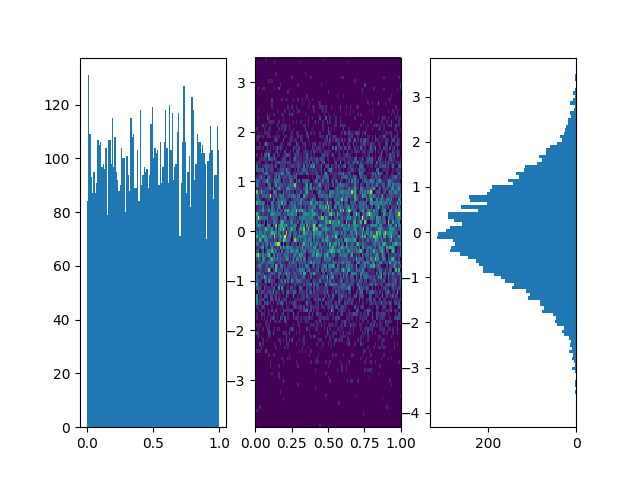

In [109]:
# Agrego unos subplots para comprender mejor qué está haciendo el hist2d con sus heatmaps.

fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3)
 
ax1.hist(X, bins=100)
ax2.hist2d(X, Y, bins=100)

# Ax3 lo giro y le invierto el sentido
ax3.hist(Y, bins=100, orientation='horizontal')
ax3.invert_xaxis()

# Podemos ver que el heat map muestra con color, los puntos donde hay mayor encuentro entre las distribuciones

# Animations

In [110]:

import matplotlib.animation as animation

#Generamos 100 datos al azar con una distribución normal

n = 100
x = np.random.randn(n)

In [111]:
# create the function that will do the plotting for every frame
# Esta función sera llamada por FuncAnim que definimos en la próxima celda

def update(frame):
    # check if animation is at the last frame, and if so, stop the animation a
    if frame == n: 
        myanimation.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:frame], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(frame), [3,27])
    


<IPython.core.display.Javascript object>


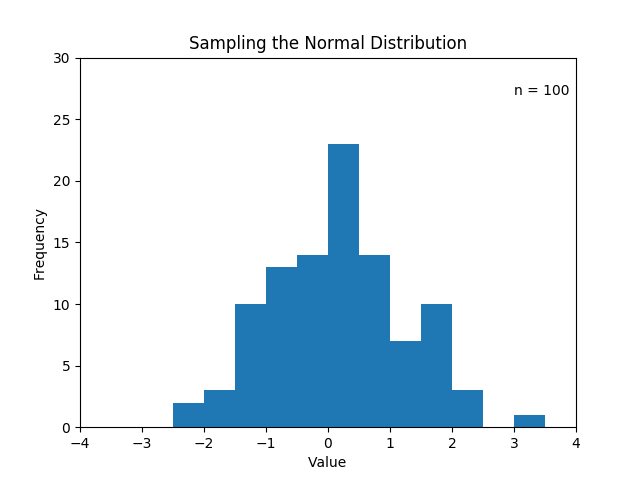

In [118]:
# Definimos el objeto FuncAnimation y le decimos que utilice la figura() para graficar en ella, usando la función
# "update" cada 100 ms. Como frames=None, la función update recibe valores generados por el iterador infiniro itertools.count()
# que genera valores empezando desde 0 y hasta infinito.
# FuncAnimation lo que hara cada 100 ms es:
# update(0) -->100 ms --> update(1) --> ... --> update(100) y en este frame, el nro 100, update interrumpirá la animación
# con el comando anim.event_source.stop()

fig = plt.figure()
myanimation = animation.FuncAnimation(fig, update, frames=None, interval=100)



# Interactivity

<IPython.core.display.Javascript object>


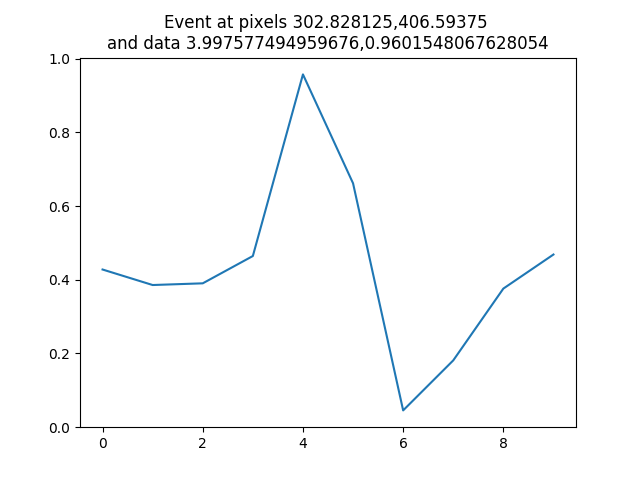

7

In [113]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)


In [114]:
from random import shuffle
import pandas as pd

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

# Creamos dataframe
df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.253829,China,0.427019
1,0.275327,Brazil,0.865477
2,0.439290,Germany,0.097579
3,0.566485,Canada,0.194111
4,0.321978,Chile,0.876463
5,0.670739,Iraq,0.886457
6,0.567538,USA,0.421869
7,0.998698,UK,0.236758
8,0.567293,India,0.839528
9,0.356569,Mexico,0.291081


<IPython.core.display.Javascript object>


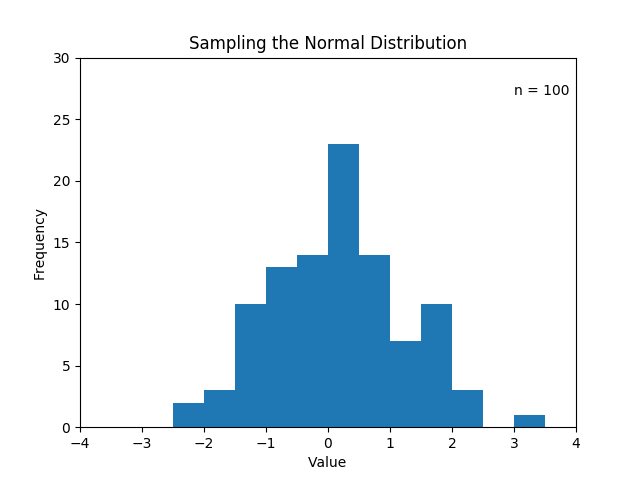

In [115]:
# Plteamos los datos de altura y peso del dataframe

plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [116]:
# Generamos la interacción con el gráfico, de modo que cuando se seleccione un punto, aparecerá el nombre del país al cual
# corresponden esos datos

# event.ind devuelve [posición del dato seleccionado], por eso le aplica luego un [0] a modo de extraer la serie y obtener
# el valor de 'origin'


def onpick(event):
    origin = df.iloc[event.ind[0]]['origin'] # mirar el comentario inmediatamenre superior
    plt.gca().set_title('Selected item came from {}'.format(origin))

    
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

# Luego de ejecutar la celda ir y hacer click sobre uno de los puntos

7

In [117]:
# df.iloc[event.ind[0]]['origin'] sería como la línea de abajo

df.iloc[[0][0]]['origin']

'China'